In [1]:
import numpy as np
import shared_functions as sf
import sympy as sp
from IPython.display import HTML
import matplotlib.pyplot as plt

In the last notebook we finished by examining the signed area of a triangle whose vertices satisfied the parameterisation of a relativistic hyperbola.
The first thing to do is bring some our functions across. Soon it will make a lot more sense to put these in a seperate .py file and call them in (in fact, we have already dont this with shared functions above) but for now we are ok



In [2]:
def compute_cross_product_from_two_points(points_list):
    c = points_list[0][0] * points_list[1][1] - points_list[0][1] * points_list[1][0]
    return(c)

def compute_signed_area_of_triangle_from_two_points(points_list):
    c = compute_cross_product_from_two_points(points_list)
    signed_area = c / 2
    return(signed_area)

def compute_signed_area_using_meisters_formula(points_list):

    total_signed_area = 0
    for each_point in range(len(points_list) - 1):
        signed_area = compute_signed_area_of_triangle_from_two_points([points_list[each_point], points_list[each_point + 1]])
        total_signed_area = total_signed_area + signed_area

    final_signed_area = compute_signed_area_of_triangle_from_two_points([points_list[-1], points_list[0]])
    total_signed_area = total_signed_area + final_signed_area

    return(total_signed_area)

def compute_using_meister_with_parabola_paramatisation(a, b, c, d):
    return (((d - b) * (c - a)* (d - a + b - c)) / 2)


 Let's continue the theme of examining curves and look at signed area on the folium of descartes. The curve can be described as $x^3+y^3-3xy=0$ and parameterised by  $$ g(t)=\left[\frac{3t}{t^3+1},\frac{3t^2}{t^3+1}\right].$$


Recall that with these types of problems we are first finding points that meet certain criteria, and then putting these points into the formula above

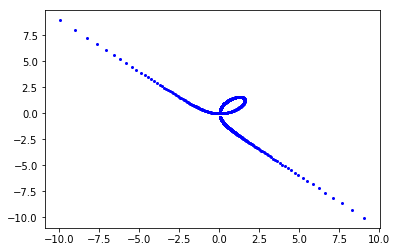

In [12]:
values_for_parameterisation = []

values_for_parameterisation.extend(np.arange(start=-10, stop=-1.1, step=.01)) 
values_for_parameterisation.extend(np.arange(start=-.9, stop=10, step=.01)) 

curve_points_x = [(3 * i)/(i^3 + 1) for i in values_for_parameterisation]
curve_points_y = [(3 * i^2)/(i^3 + 1) for i in values_for_parameterisation]


fig, ax = plt.subplots()
ax.plot(curve_points_x, curve_points_y, 'bo', markersize = 2)


This visualisation accords with what we know, bu we should never assume things just from a picture: we need to prove things algebraically. Let's also check that a general point created from this parametisation also satisfies

In [4]:
t = sp.symbols('t')
p_1 = ((3 * t)/(t^3 + 1))
p_2 = ((3 * t^2)/(t^3 + 1))

r = sp.Eq(p_1^3 + p_2^3 - (3 * p_1 * p_2), 0)
r.expand()

Eq(27*t**6/(t**9 + 3*t**6 + 3*t**3 + 1) + 27*t**3/(t**9 + 3*t**6 + 3*t**3 + 1) - 27*t**3/(t**6 + 2*t**3 + 1), 0)

That looks pretty bad, but when it is factored, it just comes out as $0 = 0$

In [5]:
r.factor()

True

Just as we have done previously, we can also create some points using this parameterisation of $ g(t)=\left[\frac{3t}{t^3+1},\frac{3t^2}{t^3+1}\right]$ and pass this into our Meisters formula function to give us a signed area of an orientated triangle on the Folium of Descartes would be:  

In [6]:
t_1, t_2, t_3 = sp.symbols('t_1, t_2, t_3')

p_1 = ((3 * t_1)/(t_1^3 + 1))
p_2 = ((3 * t_1^2)/(t_1^3 + 1))

p_3 = ((3 * t_2)/(t_2^3 + 1))
p_4 = ((3 * t_2^2)/(t_2^3 + 1))

p_5 = ((3 * t_3)/(t_3^3 + 1))
p_6 = ((3 * t_3^2)/(t_3^3 + 1))

s =compute_signed_area_using_meisters_formula([[p_1, p_2], [p_3, p_4], [p_5, p_6]])
show(s)

-9/2*t_1^2*t_2/((t_1^3 + 1)*(t_2^3 + 1)) + 9/2*t_1*t_2^2/((t_1^3 + 1)*(t_2^3 + 1)) + 9/2*t_1^2*t_3/((t_1^3 + 1)*(t_3^3 + 1)) - 9/2*t_2^2*t_3/((t_2^3 + 1)*(t_3^3 + 1)) - 9/2*t_1*t_3^2/((t_1^3 + 1)*(t_3^3 + 1)) + 9/2*t_2*t_3^2/((t_2^3 + 1)*(t_3^3 + 1))

And let's factor: 

In [7]:
show(s.factor())

-9/2*(t_1*t_2*t_3 + 1)*(t_1 - t_2)*(t_1 - t_3)*(t_2 - t_3)/((t_1^2 - t_1 + 1)*(t_2^2 - t_2 + 1)*(t_3^2 - t_3 + 1)*(t_1 + 1)*(t_2 + 1)*(t_3 + 1))

Still could be simpler to look at. Let's manipulate the expression a little more: 

In [8]:
show(s.numerator().factor() / s.denominator())

-9/2*(t_1*t_2*t_3 + 1)*(t_1 - t_2)*(t_1 - t_3)*(t_2 - t_3)/((t_1^3 + 1)*(t_2^3 + 1)*(t_3^3 + 1))

That looks ok. Note that we can also just get rid of that sign out the front and we end up with a formula for the area of an orientated triangle on the Folium of Descartes as follows:  
$$   \frac{9(t_1-t_2)(t_2-t_3)(t_3-t_1)(t_1t_2t_3+1)}{2(t_1^3+1)(t_2^3+1)(t_3^3+1)}.$$

Though this curve looks more complicated that the others, we can easily use it to compute fixed and arbitray points. 

Let's try an example. If we have two points, $A = [\frac{6}{7}, \frac{-12}{7}]$ and $B = [\frac{4}{3}, \frac{2}{3}]$ if we have two points that are fixed, we could calculate an arbitrary third point, C that satisfies and the parmeterisation . As always, let's start with a visualisation

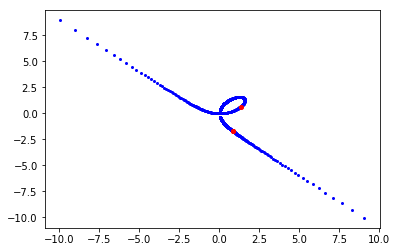

In [20]:
values_for_parameterisation = []

values_for_parameterisation.extend(np.arange(start=-10, stop=-1.1, step=.01)) 
values_for_parameterisation.extend(np.arange(start=-.9, stop=10, step=.01)) 

curve_points_x = [(3 * i)/(i^3 + 1) for i in values_for_parameterisation]
curve_points_y = [(3 * i^2)/(i^3 + 1) for i in values_for_parameterisation]


points_choice = np.array([[6/7, -12/7],[4/3,2/3]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)
triangle_points_x = [e[0] for e in points_for_plotting]
triangle_points_y = [e[1] for e in points_for_plotting]


fig, ax = plt.subplots()
ax.plot(curve_points_x, curve_points_y, 'bo', markersize = 2)
ax.plot(triangle_points_x, triangle_points_y, 'ro', markersize = 4)


So we need to find some 3rd point that would collinear to the other two points. 

Let's used our derived formula above, and note that we need 3 $t_1, t_2$ and $t_3$ to plug into this formula. The first thing to do is used the existing points to find values we can use for $t_1, t_2$. For $t_1$

In [45]:
t_1 = sp.symbols('t_1')

x_param = ((3 * t_1)/(t_1^3 + 1))
e_1 = sp.Eq(x_param, 6/7)

y_param = ((3 * t_1^2)/(t_1^3 + 1))
e_2 = sp.Eq(y_param, -12/7)


print(sp.solve(e_1, t_1))
print(sp.solve(e_2, t_1))

[-2, 1 - sqrt(2)/2, sqrt(2)/2 + 1]
[-2, 1/8 - sqrt(31)*I/8, 1/8 + sqrt(31)*I/8]


We get a few solutions, but the common solution to both is $t_1 = -2$. And now for $t_2$:

In [48]:
t_2 = sp.symbols('t_2')

x_param = ((3 * t_2)/(t_2^3 + 1))
e_1 = sp.Eq(x_param, 4/3)

y_param = ((3 * t_2^2)/(t_2^3 + 1))
e_2 = sp.Eq(y_param, 2/3)


print(sp.solve(e_1, t_2))
print(sp.solve(e_2, t_2))

[1/2, -1/4 + sqrt(33)/4, -sqrt(33)/4 - 1/4]
[1/2, 2 - sqrt(6), 2 + sqrt(6)]


Again, a few solutions, but the common solution is $t_2 = \frac{1}{2}$. Now let's create a function for this formula and plug these values in to get an area of an orientated triangle on the Folium of Descartes, with unknown point, $t_3$

In [50]:
def compute_signed_area_of_orientated_triangle_on_folium_of_descartes(a, b, c):
    numerator = 9 * (a - b)* (b - c) * (c - a) * (a * b * c + 1)
    denominator = 2 * (a^3 + 1) * (b^3 + 1) * (c^3 + 1)
    return(numerator / denominator)

In [52]:
t_3 = sp.symbols('t_3')

r = compute_signed_area_of_orientated_triangle_on_folium_of_descartes(-2, 1/2, t_3)
show(r)

5/7*(2*t_3 - 1)*(t_3 + 2)*(t_3 - 1)/(t_3^3 + 1)

We now have an orientated area in terms of our unknown value $t_3$. Let's assume the area equals 0 (meaning the points must be colinear) and solve for $t_3$:

We are interested in the value of t when the area equals 0, so set the expression to 0, and solve for $t$:

In [54]:
e = sp.Eq(r, 0)
e

Eq(5*(t_3 - 1)*(t_3 + 2)*(2*t_3 - 1)/(7*(t_3**3 + 1)), 0)

And solve for t:

In [55]:
sp.solve(e, t_3)

[-2, 1/2, 1]

3 results returned. -2 and 1/2 are already possible values to parametise. 1 the new one. Let's put this value 1 into parameterisation $ g(t)=\left[\frac{3t}{t^3+1},\frac{3t^2}{t^3+1}\right]$  for the folium and get a third point, $[\frac{3}{2}, \frac{3}{2}]$. Finally, let's have a look at it: 

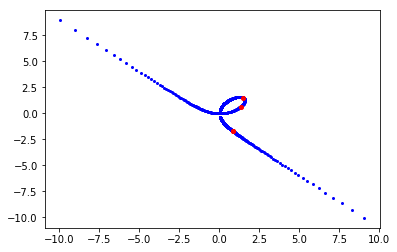

In [58]:
values_for_parameterisation = []

values_for_parameterisation.extend(np.arange(start=-10, stop=-1.1, step=.01)) 
values_for_parameterisation.extend(np.arange(start=-.9, stop=10, step=.01)) 

curve_points_x = [(3 * i)/(i^3 + 1) for i in values_for_parameterisation]
curve_points_y = [(3 * i^2)/(i^3 + 1) for i in values_for_parameterisation]


points_choice = np.array([[6/7, -12/7],[4/3,2/3], [3/2,3/2]])
points_for_plotting = np.append(points_choice, [points_choice[0]], axis=0)
triangle_points_x = [e[0] for e in points_for_plotting]
triangle_points_y = [e[1] for e in points_for_plotting]


fig, ax = plt.subplots()
ax.plot(curve_points_x, curve_points_y, 'bo', markersize = 2)
ax.plot(triangle_points_x, triangle_points_y, 'ro', markersize = 4)


In [ ]:
# POD PRODUCT